# Introduction

This is the first _notebook_ of the **Deep Learning Bootcamp**

We will cover four session today

1. Introduction
2. Theory
3. CNN
4. Transfer Learning

![](http://lorempixel.com/200/200)

This is run by [amitkaps](http://amitkaps)

## Basic Data Structure in Python

Variable

In [5]:
x = 2
y = 3.0

In [6]:
x + y

5.0

In [7]:
type(x), type(y)

(int, float)

Array

In [18]:
x = [1, 2, 5, "b"]

In [19]:
x

[1, 2, 5, 'b']

In [20]:
type(x)

list

In [21]:
for i in x:
    print(i*i)

1
4
25


TypeError: can't multiply sequence by non-int of type 'str'

## Numpy

In [15]:
import numpy as np

In [16]:
a = np.arange(10)

In [17]:
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [22]:
a.mean()

4.5

In [25]:
a.dtype, a.shape

(dtype('int64'), (10,))

In [30]:
b = np.array([[1, 2, 3],
     [4, 5, 6]])

In [32]:
b.shape

(2, 3)

## Image Classification

In [36]:
import numpy as np
import tensorflow as tf
import keras

In [37]:
from keras.datasets import fashion_mnist

In [39]:
! wget http://bit.do/deephelper

--2018-03-10 05:33:23--  http://bit.do/deephelper
Resolving bit.do (bit.do)... 54.83.52.76
Connecting to bit.do (bit.do)|54.83.52.76|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://gist.githubusercontent.com/rouseguy/f3b0c511eb303a4b05051adbdcb50e11/raw/71436ea41bc738f9c04b8927af9fda49ee708bbd/helpers.py [following]
--2018-03-10 05:33:23--  https://gist.githubusercontent.com/rouseguy/f3b0c511eb303a4b05051adbdcb50e11/raw/71436ea41bc738f9c04b8927af9fda49ee708bbd/helpers.py
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.200.133
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.200.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6245 (6.1K) [text/plain]
Saving to: ‘deephelper’

deephelper          100%[===================>]   6.10K  --.-KB/s    in 0s      

2018-03-10 05:33:23 (58.9 MB/s) - ‘deephelper’ saved [6245/6245]



In [40]:
! mv deephelper helpers.py

In [41]:
! ls

Introduction.ipynb  helpers.py


## Get the data

In [42]:
(x_train, y_train) , (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [43]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [47]:
x_train.shape

(60000, 28, 28)

## View the datasets

In [50]:
import matplotlib.pyplot as plt
% matplotlib inline

### See One Image

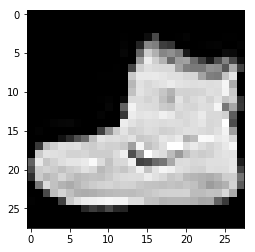

In [51]:
plt.imshow(x_train[0], cmap="gray")

In [52]:
from helpers import fashion_mnist_label

In [54]:
label = fashion_mnist_label()
label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

In [55]:
y_train[0]

9

In [60]:
def image(index):
    plt.imshow(x_train[index], cmap="gray")
    plt.title(label[y_train[index]])

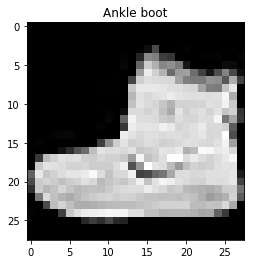

In [61]:
image(0)

###  One image of each class

In [65]:
u, indices = np.unique(y_train, return_index=True)
u, indices

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 1, 16,  5,  3, 19,  8, 18,  6, 23,  0]))

In [67]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))

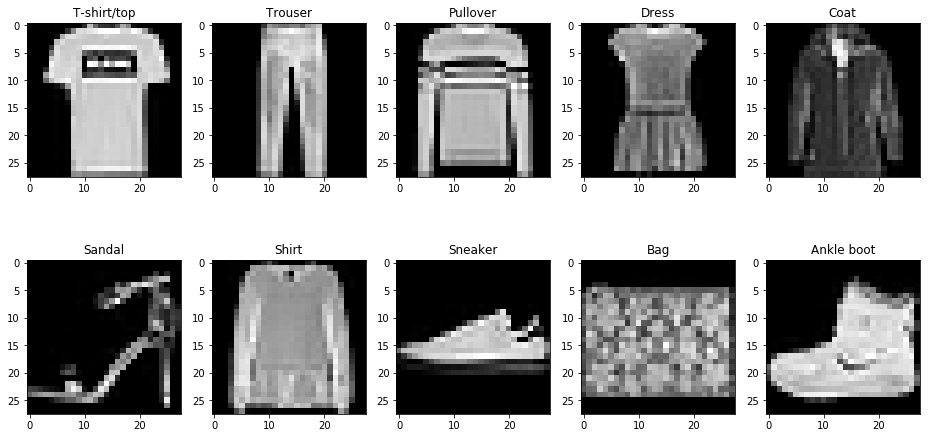

In [73]:
plt.figure(figsize=(16,8))
for i in u:
    plt.subplot(2, 5, i + 1)
    image(indices[i])

### See 500 of the images

In [76]:
from helpers import create_sprite

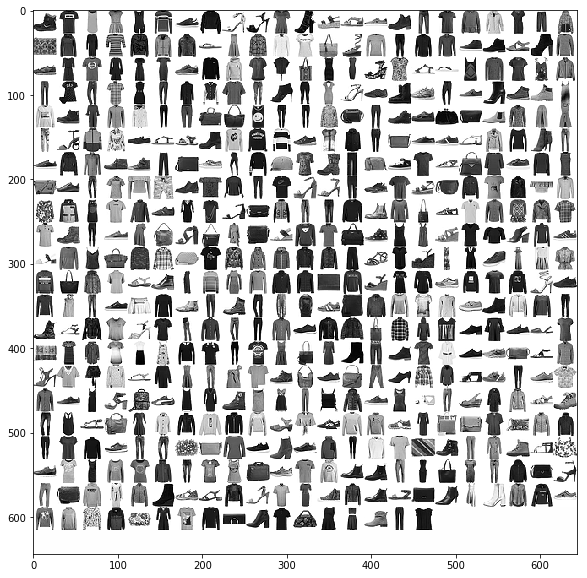

In [79]:
sprite = 1 - create_sprite(x_train[:500])
plt.figure(figsize=(10,10))
plt.imshow(sprite, cmap="gray")

In [80]:
from helpers import create_embedding

In [82]:
create_embedding('fashion_mnist', 'fashion_mnist_embedding', 500)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/fashion_mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/fashion_mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/fashion_mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/fashion_mnist/t10k-labels-idx1-ubyte.gz

    Created embedding in the directory -> logs/fashion_mnist_embedding/ 
    Run the following command from the terminal
    
    tensorboard --logdir=logs/fashion_mnist_embedding/


## Machine Learning Model

Input -> Flatten -> PCA(2) -> Classifier -> Output

### Step 1: Preprocessing the image and labels

In [83]:
# Convert type and normalize to (0,1)
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255

In [85]:
# Flatten the data from (60000, 28, 28) to (60000, 784)
x_train_flatten = x_train.reshape(60000, 28*28)
x_test_flatten = x_test.reshape(10000, 28*28)

In [87]:
# Convert class vector to binary class matrices
from keras.utils import to_categorical
y_train_class = to_categorical(y_train, 10)
y_test_class = to_categorical(y_test, 10)

### Step 2: Craft the feature transformation

In [90]:
# Do the PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(x_train_flatten)
x_train_feature_2 = pca.transform(x_train_flatten)
x_test_feature_2 = pca.transform(x_test_flatten)

In [91]:
x_train_feature_2

array([[-0.48668146,  6.4041195 ],
       [ 5.5208573 , -1.7712345 ],
       [-2.8471398 , -4.3210254 ],
       ...,
       [ 3.363294  , -4.6284857 ],
       [-3.167005  , -2.2793798 ],
       [-7.1206803 , -0.46967316]], dtype=float32)

### Step 3: Create a learning model

In [92]:
from keras.models import Sequential
from keras.layers import Dense

In [93]:
model_simple2 = Sequential()
model_simple2.add(Dense(10, input_shape = (2,), 
                        activation="softmax"))

In [94]:
model_simple2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                30        
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


### Step 4: Compile and fit the model

In [95]:
model_simple2.compile(loss='categorical_crossentropy', 
                      optimizer= "sgd",
                     metrics = ['accuracy'])

In [98]:
%time
model_simple2.fit(x_train_feature_2, y_train_class,
                 batch_size=128, epochs=20, verbose=1)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 14.8 µs
Epoch 1/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.3543 - acc: 0.4601
Epoch 2/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.3422 - acc: 0.4622
Epoch 3/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.3317 - acc: 0.4639
Epoch 4/20
60000/60000 [==============================] - 1s 11us/step - loss: 1.3227 - acc: 0.4660
Epoch 5/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.3147 - acc: 0.4672
Epoch 6/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.3075 - acc: 0.4691
Epoch 7/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.3013 - acc: 0.4704
Epoch 8/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.2956 - acc: 0.4698
Epoch 9/20
60000/60000 [==============================] - 1s 12us/step - loss: 1.2904 - acc: 0.4720
Epoch 10/20
60000/60000 [===========

### Step 5: Check the performance of the model

In [100]:
score = model_simple2.evaluate(x_test_feature_2, y_test_class)

10000/10000 [==============================] - 0s 17us/step


In [101]:
print("test loss", score[0])
print("test accuracy", score[1])

test loss 1.25823219165802
test accuracy 0.4754


### Step 6: Make and Visualise a prediction 

In [103]:
model_simple2.predict_proba(x_test_feature_2)[0]

array([1.9818361e-05, 6.8200342e-07, 1.5888336e-03, 4.0887280e-06,
       2.8240826e-04, 2.7691814e-01, 8.4388920e-04, 4.5996797e-01,
       5.9418723e-02, 2.0095538e-01], dtype=float32)

In [104]:
from helpers import plot_prediction, plot_2d_model

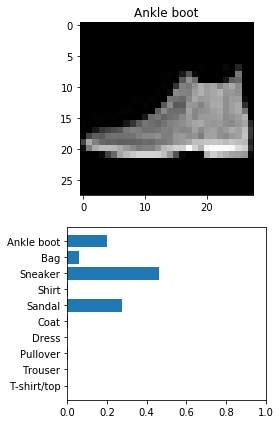

In [105]:
plot_prediction(0, x_test, y_test, x_test_feature_2, model_simple2)

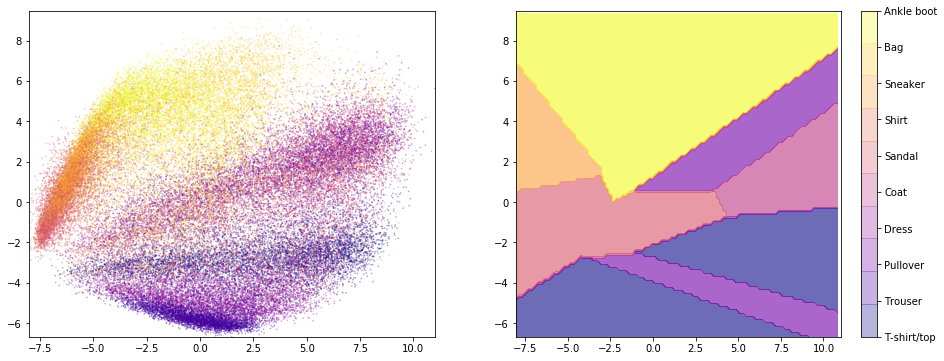

In [106]:
plot_2d_model(model_simple2, x_train_feature_2, y_train)

## Deep Learning Network

### Step 2 & 3: Learn the transformation & classifier together

In [110]:
model_simple_dl = Sequential()
model_simple_dl.add(Dense(100, input_shape = (784,), 
                          activation="linear"))
model_simple_dl.add(Dense(10, 
                        activation="softmax"))

In [111]:
model_simple_dl.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


### Step 4: Compile and Fit the model

In [113]:
model_simple_dl.compile(loss='categorical_crossentropy', 
                      optimizer= "sgd",
                     metrics = ['accuracy'])

In [119]:
from helpers import MetricHistory

In [120]:
history = MetricHistory()

In [129]:
%time
model_simple_dl.fit(x_train_flatten, y_train_class,
                 batch_size=128, epochs=20, verbose=1, 
                callbacks = [history])

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 15.7 µs
Epoch 1/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3909 - acc: 0.8650
Epoch 2/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3907 - acc: 0.8655
Epoch 3/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3903 - acc: 0.8654
Epoch 4/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3897 - acc: 0.8660
Epoch 5/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3892 - acc: 0.8661
Epoch 6/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3891 - acc: 0.8659
Epoch 7/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3884 - acc: 0.8661
Epoch 8/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3881 - acc: 0.8658
Epoch 9/20
60000/60000 [==============================] - 1s 22us/step - loss: 0.3872 - acc: 0.8665
Epoch 10/20
60000/60000 [===========

In [128]:
60000/128*20

9375.0

(0, 1)

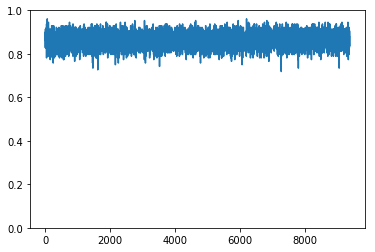

In [127]:
plt.plot(history.accuracy)
plt.ylim(0,1)

### Step 5: Score the model

In [115]:
score = model_simple_dl.evaluate(x_test_flatten, y_test_class)

10000/10000 [==============================] - 0s 34us/step


In [116]:
print("test loss", score[0])
print("test accuracy", score[1])

test loss 0.4610845034122467
test accuracy 0.8361


### Step 6: Make and Visualise a prediction 

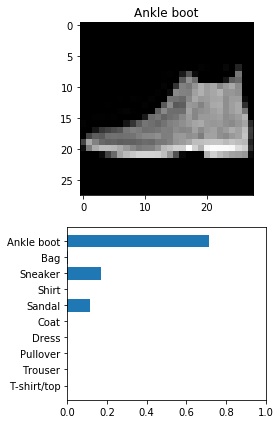

In [118]:
plot_prediction(0, x_test, y_test, x_test_flatten, model_simple_dl)